<a href="https://colab.research.google.com/github/priyanka-sidhuraj/127/blob/main/135_Priyanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import csv
import plotly.express as px

rows = [] #all th data

with open("main.csv", "r") as f:
  csvreader = csv.reader(f)
  for row in csvreader: 
    rows.append(row)

headers = rows[0]
planet_data_rows = rows[1:]



In [38]:
headers[0] = "row_num"

solar_system_planet_count = {}

for planet_data in planet_data_rows:
  if solar_system_planet_count.get(planet_data[11]):
    solar_system_planet_count[planet_data[11]] += 1 #checking the count
  else:
    solar_system_planet_count[planet_data[11]] = 1

max_solar_system = max(solar_system_planet_count, key=solar_system_planet_count.get)

# lis = ['1', '100', '111', '2']
#max(lis)
#'111'


print("Solar system which has maximum planets out of all the solar systems we have discovered so far!",max_solar_system)

Solar system which has maximum planets out of all the solar systems we have discovered so far! KOI-351


In [39]:
temp_planet_data_rows = list(planet_data_rows)

for planet_data in temp_planet_data_rows:
  planet_mass = planet_data[3]
  if planet_mass.lower() == "unknown": #unknown
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_mass_value = planet_mass.split(" ")[0]
    planet_mass_ref = planet_mass.split(" ")[1]
    if planet_mass_ref == "Jupiters":
      planet_mass_value = float(planet_mass_value) * 317.8
    planet_data[3] = planet_mass_value

  planet_radius = planet_data[7]
  if planet_radius.lower() == "unknown":
    planet_data_rows.remove(planet_data)
    continue
  else:
    planet_radius_value = planet_radius.split(" ")[0]
    planet_radius_ref = planet_radius.split(" ")[2]
    if planet_radius_ref == "Jupiter":
      planet_radius_value = float(planet_radius_value) * 11.2
    planet_data[7] = planet_radius_value


koi_351_planets = []
for planet_data in planet_data_rows:
  if max_solar_system == planet_data[11]:
    koi_351_planets.append(planet_data)

print(len(koi_351_planets))

7


The Value of G (Gravitational Constant) is 6.674e-11

Mass of Earth = 5.972e+24

Radius of Earth = 6371000

In [40]:
temp_planet_data_rows = list(planet_data_rows)


planet_masses = []
planet_radiuses = []
planet_names = []
for planet_data in planet_data_rows:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_names.append(planet_data[1])
planet_gravity = []
for index, name in enumerate(planet_names):
  gravity = (float(planet_masses[index])*5.972e+24)  * 6.674e-11/ (float(planet_radiuses[index])*float(planet_radiuses[index])*6371000*6371000)
  planet_gravity.append(gravity)

fig = px.scatter(x=planet_radiuses, y=planet_masses)
fig.show()

Our Earth’s gravity is 9.8 m/s, and we as humans are accustomed to it.

In order for us to exist on any other planet, the gravity should be close to what we have here.

Mars has a gravity of 3.711 m/s and Moon has a gravity of 1.62 m/s.

In [5]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


In [6]:
planet_type_values = []
for planet_data in planet_data_rows:
  planet_type_values.append(planet_data[6])

print(list(set(planet_type_values)))

['Neptune-like', 'Super Earth', 'Terrestrial', 'Gas Giant']


Now that we have the types of planets that are out there, let’s understand these terms -

Neptune-like => These planets are like neptune! They are big in size and have rings around them. They are also made of Ice.

Super-Earth => These are the planets that have mass greater than earth but smaller than that of Neptune! (Neptune is 17 times Earth)

Terrestrial => It is a planet that is composed primarily of silicate rocks or metals (Like Earth, Mars)

Gas Giant => There are the planets that are composed of Gas (Hydrogen and Heliu

In [7]:
suitable_planets = []
for planet_data in planet_data_rows:
  if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
    suitable_planets.append(planet_data)

print(len(suitable_planets))

1485


In [8]:
planet_masses = []
planet_radiuses = []
planet_types = []

for planet_data in planet_data_rows:
  planet_masses.append(planet_data[3])
  planet_radiuses.append(planet_data[7])
  planet_types.append(planet_data[6])

fig = px.scatter(x=planet_radiuses, y=planet_masses, color=planet_types)
fig.show()

In [9]:
low_gravity_planets = []
for index, gravity in enumerate(planet_gravity):
  if gravity > 12: #9.8
    low_gravity_planets.append(planet_data_rows[index])

print(len(low_gravity_planets))

1799


In [10]:
suitable_planets = []
for planet_data in low_gravity_planets:
  if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
    suitable_planets.append(planet_data)

print(len(suitable_planets))

820


In [11]:
print(headers)

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']


Orbital radius is the distance of the
planet from the host star.
Orbital period is the time the planet
takes to complete one orbit around its
Sun!

In [12]:
temp_suitable_planets = list(suitable_planets)

for planet_data in temp_suitable_planets:
  if planet_data[8].lower() == "unknown":
    suitable_planets.remove(planet_data)

for planet_data in suitable_planets:
  if planet_data[9].split(" ")[1].lower() == "days":
    planet_data[9] = float(planet_data[9].split(" ")[0]) #Days
  else:
    planet_data[9] = float(planet_data[9].split(" ")[0])*365 
    #Years notation should be converted into days by multiplying it with 365

    
  planet_data[8] = float(planet_data[8].split(" ")[0])

orbital_radiuses = []
orbital_periods = []

for planet_data in suitable_planets:
  orbital_radiuses.append(planet_data[8])
  orbital_periods.append(planet_data[9])

fig = px.scatter(x=orbital_radiuses, y=orbital_periods)
fig.show()

Here, we can see that most of the
suitable planets lie within 2
astronomical units, which is great!
1. If a planet is too close to its
sun, we can say that the planet
will be too hot for us to survive.
2. If a planet is too far away from
its sun, we can say that the
planet will be too cold for us to
survive.
We call this the Goldilock Zone.
Goldilock Zone is the habitable zone
where the planet is more likely to
have just the right conditions to
sustain life.
For us, we are at the very beginning
of the Goldilock Zone whereas Mars
is at the end of it.
Earth is 1AU from the Sun and Mars
is 1.5AU from the Sun.
Some studies suggest on average,
any planet that lies within 0.38 - 2 AU
is likely to be habitable.


In [13]:
goldilock_planets = list(suitable_planets) #We will leave suitable planet list as it is

temp_goldilock_planets = list(suitable_planets) 
for planet_data in temp_goldilock_planets:
  if planet_data[8] < 0.38 or planet_data[8] > 2:
    goldilock_planets.remove(planet_data)

print(len(suitable_planets))
print(len(goldilock_planets))

417
11


The list of suitable planets gives us
417 and out of those, only 11 are in
Goldilock Zone!

Our Earth revolves around the sun at
30km/s. Similarly, our solar system
revolves around the center of the
Milky Way galaxy at the speed of
200km/s.
Given this data, we can
assume that if a planet revolves at the
speed of 200km/s, we can survive
that. We are already surviving such
high speeds!
That means that the planet that’s in
the Goldilock zone would take
anywhere from 30 to 50 days to
complete it’s 1 year (1 revolution
around its sun). It would be 6-7 times
faster than us.


In [14]:
planet_speeds = []
for planet_data in suitable_planets:
  distance = 2 * 3.14 * (planet_data[8] * 1.496e+9) #to convert our orbital radius from AU to KM. 2 pi r
  time = planet_data[9] * 86400 #convreting into seconds
  speed = distance / time
  planet_speeds.append(speed)

speed_supporting_planets = list(suitable_planets) #We will leave suitable planet list as it is

temp_speed_supporting_planets = list(suitable_planets)

for index, planet_data in enumerate(temp_speed_supporting_planets):
  if planet_speeds[index] > 200:
    speed_supporting_planets.remove(planet_data)

print(len(speed_supporting_planets))

5


In [15]:
final_dict = {}

for index, planet_data in enumerate(planet_data_rows):
  features_list = []
  gravity = (float(planet_data[3])*5.972e+24) + (float(planet_data[7])*float(planet_data[7])*6371000*6371000) / 6.674e-11
  try:
    if gravity > 15:
      features_list.append("gravity")
  except: pass
  try:
    if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
      features_list.append("planet_type")
  except: pass
  try:
    if planet_data[8] > 0.38 or planet_data[8] < 2:
      features_list.append("goldilock")
  except: pass
  try:
    distance = 2 * 3.14 * (planet_data[8] * 1.496e+9)
    time = planet_data[9] * 86400
    speed = distance / time
    if speed < 200:
      features_list.append("speed")
  except: pass
  final_dict[index] = features_list

print(final_dict)

{0: ['gravity'], 1: ['gravity'], 2: ['gravity'], 3: ['gravity'], 4: ['gravity'], 5: ['gravity'], 6: ['gravity'], 7: ['gravity'], 8: ['gravity'], 9: ['gravity'], 10: ['gravity'], 11: ['gravity'], 12: ['gravity'], 13: ['gravity'], 14: ['gravity'], 15: ['gravity'], 16: ['gravity'], 17: ['gravity'], 18: ['gravity'], 19: ['gravity'], 20: ['gravity'], 21: ['gravity'], 22: ['gravity'], 23: ['gravity'], 24: ['gravity'], 25: ['gravity'], 26: ['gravity'], 27: ['gravity'], 28: ['gravity'], 29: ['gravity', 'planet_type', 'goldilock'], 30: ['gravity'], 31: ['gravity'], 32: ['gravity'], 33: ['gravity'], 34: ['gravity'], 35: ['gravity'], 36: ['gravity'], 37: ['gravity'], 38: ['gravity'], 39: ['gravity'], 40: ['gravity'], 41: ['gravity'], 42: ['gravity'], 43: ['gravity'], 44: ['gravity'], 45: ['gravity'], 46: ['gravity'], 47: ['gravity'], 48: ['gravity'], 49: ['gravity'], 50: ['gravity'], 51: ['gravity'], 52: ['gravity'], 53: ['gravity'], 54: ['gravity'], 55: ['gravity'], 56: ['gravity'], 57: ['gravit

In [16]:
gravity_planet_count = 0
for key, value in final_dict.items():
  if "gravity" in value:
    gravity_planet_count += 1

print(gravity_planet_count)

4251


In [17]:
type_planet_count = 0
for key, value in final_dict.items():
  if "planet_type" in value:
    type_planet_count += 1

print(type_planet_count)

1485


In [18]:
goldilock_planet_count = 0
for key, value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count += 1

print(goldilock_planet_count)

417


In [19]:
speed_planet_count = 0
for key, value in final_dict.items():
  if "speed" in value:
    speed_planet_count += 1

print(speed_planet_count)

5


135

In [28]:
final_dict = {}

for index, planet_data in enumerate(planet_data_rows):
  features_list = []
  gravity = (float(planet_data[3])*5.972e+24) + (float(planet_data[7])*float(planet_data[7])*6371000*6371000) / 6.674e-11
  try:
    if gravity > 12:
      features_list.append("gravity")
  except: pass
  try:
    if planet_data[6].lower() == "terrestrial" or planet_data[6].lower() == "super earth":
      features_list.append("planet_type")
  except: pass
  try:
    if float(planet_data[8].split(" ")[0]) > 0.38 and float(planet_data[8].split(" ")[0]) < 2:
      features_list.append("goldilock")
  except: 
    try:
      if planet_data[8] > 0.38 and planet_data[8] < 2:
        features_list.append("goldilock")
    except: pass
  try:
    try:
      distance = 2 * 3.14 * (float(planet_data[8].split(" ")[0]) * 1.496e+9)
    except:
      try:
        distance = 2 * 3.14 * (float(planet_data[8]) * 1.496e+9)
      except: pass
    try:
      time, unit = planet_data[9].split(" ")[0], planet_data[9].split(" ")[1]
      if unit.lower() == "days":
        time = float(time)
      else:
        time = float(time) * 365
    except:
      time = planet_data[9]
    time = time * 86400
    speed = distance / time
    if speed < 200:
      features_list.append("speed")
  except: pass
  final_dict[planet_data[1]] = features_list

print(final_dict)

{'11 Comae Berenices b': ['gravity', 'goldilock'], '11 Ursae Minoris b': ['gravity', 'goldilock'], '14 Andromedae b': ['gravity', 'goldilock'], '14 Herculis b': ['gravity', 'speed'], '16 Cygni B b': ['gravity', 'goldilock'], '18 Delphini b': ['gravity'], '1RXS J160929.1-210524 b': ['gravity', 'speed'], '24 Bootis b': ['gravity'], '24 Sextantis b': ['gravity', 'goldilock'], '24 Sextantis c': ['gravity'], '2MASS J01033563-5515561 AB b': ['gravity', 'speed'], '2MASS J01225093-2439505 b': ['gravity', 'speed'], '2MASS J02192210-3925225 b': ['gravity', 'speed'], '2MASS J04414489+2301513 b': ['gravity', 'speed'], '2MASS J12073346-3932539 b': ['gravity', 'speed'], '2MASS J19383260+4603591 b': ['gravity', 'goldilock'], '2MASS J21402931+1625183 A b': ['gravity', 'speed'], '2MASS J22362452+4751425 b': ['gravity', 'speed'], '30 Arietis B b': ['gravity', 'goldilock'], '42 Draconis b': ['gravity', 'goldilock'], '47 Ursae Majoris b': ['gravity'], '47 Ursae Majoris c': ['gravity', 'speed'], '47 Ursae 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



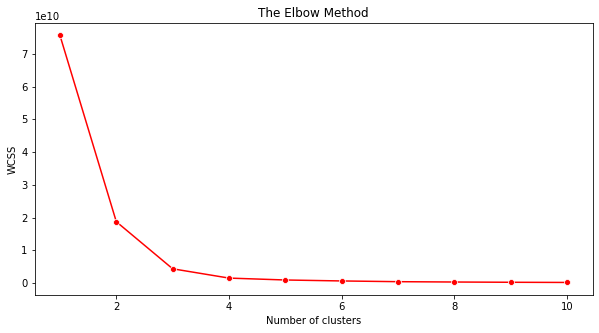

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = [] #both radius and mass
for index, planet_mass in enumerate(planet_masses):
  temp_list = [
                  planet_radiuses[index],
                  planet_mass
              ]
  X.append(temp_list)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[3 3 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

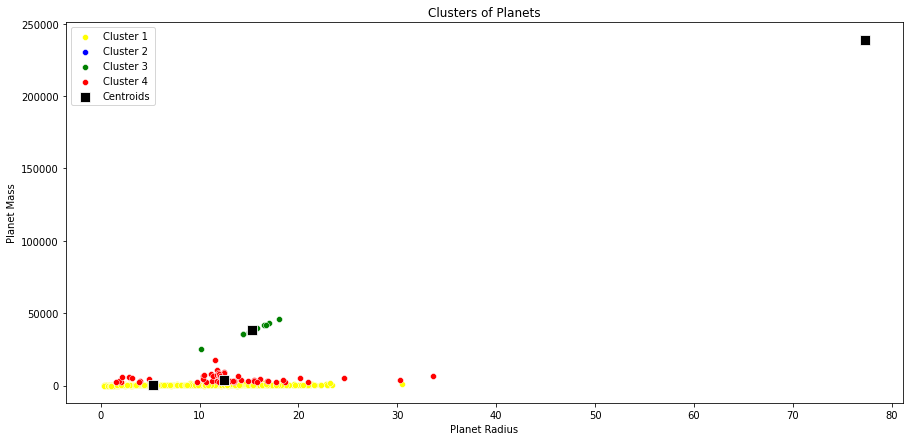

In [42]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

cluster_1_x = []
cluster_1_y = []
cluster_2_x = []
cluster_2_y = []
cluster_3_x = []
cluster_3_y = []
cluster_4_x = []
cluster_4_y = []

for index, data in enumerate(X):
 if y_kmeans[index] == 0:
   cluster_1_x.append(data[0])
   cluster_1_y.append(data[1])
 elif y_kmeans[index] == 1:
     cluster_2_x.append(data[0])
     cluster_2_y.append(data[1])
 elif y_kmeans[index] == 2:
    cluster_3_x.append(data[0])
    cluster_3_y.append(data[1])
 elif y_kmeans[index] == 3:
     cluster_4_x.append(data[0])
     cluster_4_y.append(data[1])

# #Chart with Scatter Plot
plt.figure(figsize=(15,7))
sns.scatterplot(cluster_1_x, cluster_1_y, color = 'yellow', label = 'Cluster 1')
sns.scatterplot(cluster_2_x, cluster_2_y, color = 'blue', label = 'Cluster 2')
sns.scatterplot(cluster_3_x, cluster_3_y, color = 'green', label = 'Cluster 3')
sns.scatterplot(cluster_4_x, cluster_4_y, color = 'red', label = 'Cluster 4')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', label = 'Centroids',s=100,marker=',')
plt.title('Clusters of Planets')
plt.xlabel('Planet Radius')
plt.ylabel('Planet Mass')
plt.show()

In [29]:

goldilock_planet_count = 0
for key, value in final_dict.items():
  if "goldilock" in value:
    goldilock_planet_count += 1

print(goldilock_planet_count)

414


In [30]:
goldilock_gravity_type_count = 0
for key, value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value:
    goldilock_gravity_type_count += 1

print(goldilock_gravity_type_count)

26


In [31]:
speed_planet_count = 0
for key, value in final_dict.items():
  if "speed" in value:
    speed_planet_count += 1

print(speed_planet_count)

508


In [32]:
speed_goldilock_gravity_type_count = 0
for key, value in final_dict.items():
  if "goldilock" in value and "planet_type" in value and "gravity" in value and "speed" in value:
    speed_goldilock_gravity_type_count += 1

print(speed_goldilock_gravity_type_count)

6
